# Read in data

### - Import modules

In [1]:
import os
import pandas as pd
import seaborn as sns
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt

### - Read in data

In [2]:
file='Pain tracker.xlsx'
df = pd.read_excel(file)

### - Basic cleaning

In [3]:
df = df.drop(columns = [col for col in df.columns if 'Unnamed:' in col])
df['Date'] = pd.to_datetime(df['Date'])

### - Show sample of data

In [4]:
df.head()

,Location,Day,Date,Time,Side,y location,x location,Pain type,Pain level,arm,Comment
0,NaN,Tuesday,2020-05-13,12:30:00,F,BB,23.0,W,L,NaN,NaN
1,NaN,Tuesday,2020-05-13,17:45:00,NaN,NaN,NaN,NP,NaN,NaN,NaN
2,NaN,Tuesday,2020-05-13,10:00:00,F,BA,123.0,P,L,NaN,NaN
3,NaN,Tuesday,2020-05-13,11:20:00,F,E,12345.0,B,L,NaN,NaN
4,NaN,Tuesday,2020-05-13,11:20:00,F,BA,23.0,P,L,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Location    55 non-null     object        
 1   Day         1384 non-null   object        
 2   Date        1384 non-null   datetime64[ns]
 3   Time        1169 non-null   object        
 4   Side        1163 non-null   object        
 5   y location  1166 non-null   object        
 6   x location  1165 non-null   float64       
 7   Pain type   1242 non-null   object        
 8   Pain level  1185 non-null   object        
 9   arm         544 non-null    object        
 10  Comment     70 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 70.3+ KB


# Clean data

### - Drop columns not of interest

In [6]:
df = df.drop(columns=['Location'])
df = df.drop(columns=['Comment'])

In [7]:
df.head()

,Day,Date,Time,Side,y location,x location,Pain type,Pain level,arm
0,Tuesday,2020-05-13,12:30:00,F,BB,23.0,W,L,NaN
1,Tuesday,2020-05-13,17:45:00,NaN,NaN,NaN,NP,NaN,NaN
2,Tuesday,2020-05-13,10:00:00,F,BA,123.0,P,L,NaN
3,Tuesday,2020-05-13,11:20:00,F,E,12345.0,B,L,NaN
4,Tuesday,2020-05-13,11:20:00,F,BA,23.0,P,L,NaN


### - Drop rows not of interest

In [8]:
# drop rows with no pain related data at all
df = df[~df.drop(columns=['Day','Date','Time']).isna().all(axis=1)]

# drop rows with 'NP' (No Pain) recorded
df = df[df['Pain type']!='NP']
df = df[df['Pain level']!='NP']

# drop rows with no location data
df = df[~(df['y location'].isna()) & ~(df['x location'].isna())]

# fill missing data
df['Side'] = df['Side'].fillna('F')
df['Time'] = df['Time'].fillna('16:00:00')
df['arm'] = df['arm'].fillna('R')

# ensure 'Time' column is in correct format (following time imputation)
df['Time'] = pd.to_datetime(df['Time'].astype(str)).dt.time

# reset index after removing rows
df = df.reset_index(drop=True)

# df['key'] = df['y location']+df['x location'].astype(str)
# res = df.groupby('key')['Side'].count().reset_index().rename(columns={'Side':'freq'})
# res_dict = res.set_index('key')['freq'].to_dict()

In [9]:
df.head()

,Day,Date,Time,Side,y location,x location,Pain type,Pain level,arm
0,Tuesday,2020-05-13,12:30:00,F,BB,23.0,W,L,R
1,Tuesday,2020-05-13,10:00:00,F,BA,123.0,P,L,R
2,Tuesday,2020-05-13,11:20:00,F,E,12345.0,B,L,R
3,Tuesday,2020-05-13,11:20:00,F,BA,23.0,P,L,R
4,Wednesday,2020-05-14,09:30:00,F,AC,345.0,W,L,R


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Day         1165 non-null   object        
 1   Date        1165 non-null   datetime64[ns]
 2   Time        1165 non-null   object        
 3   Side        1165 non-null   object        
 4   y location  1165 non-null   object        
 5   x location  1165 non-null   float64       
 6   Pain type   1165 non-null   object        
 7   Pain level  1165 non-null   object        
 8   arm         1165 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 50.1+ KB


### - Fill in date range

In [11]:
idx =  pd.date_range(df['Date'].min(),df['Date'].max())
df_idx = pd.DataFrame(idx,columns=['Date'])
df = df_idx.merge(df,on='Date',how='left')
df.index.name=None

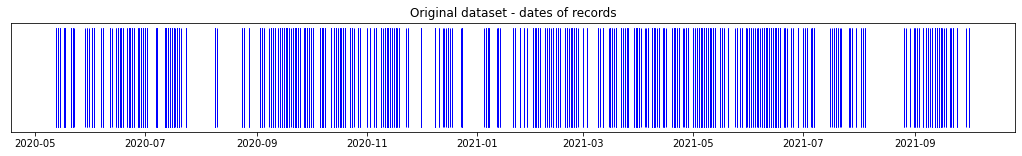

In [12]:
xs = df.dropna(subset=['Side', 'y location', 'x location', 'Pain type','Pain level', 'arm'])['Date']

fig,ax=plt.subplots(figsize=(18,2))
for x in xs:
    ax.vlines(x=x,ymin=0,ymax=1,linewidth=1,color='b')
ax.yaxis.set_visible(False)
a = ax.set_title('Original dataset - dates of records')

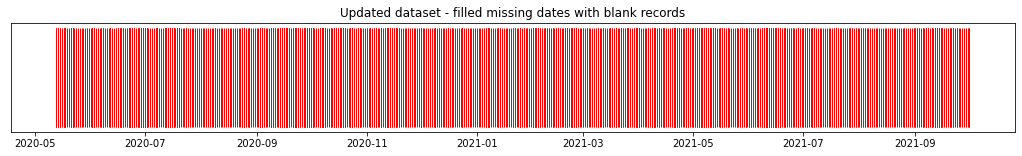

In [13]:
xs = df['Date']

fig,ax=plt.subplots(figsize=(18,2))
for x in xs:
    ax.vlines(x=x,ymin=0,ymax=1,linewidth=1,color='r')
ax.yaxis.set_visible(False)
a = ax.set_title('Updated dataset - filled missing dates with blank records')

### - Format string values to upper case

In [14]:
df.head()

,Date,Day,Time,Side,y location,x location,Pain type,Pain level,arm
0,2020-05-13,Tuesday,12:30:00,F,BB,23.0,W,L,R
1,2020-05-13,Tuesday,10:00:00,F,BA,123.0,P,L,R
2,2020-05-13,Tuesday,11:20:00,F,E,12345.0,B,L,R
3,2020-05-13,Tuesday,11:20:00,F,BA,23.0,P,L,R
4,2020-05-14,Wednesday,09:30:00,F,AC,345.0,W,L,R


In [15]:
upper_case_cols = ['Side', 'y location','Pain type', 'Pain level', 'arm']
df[upper_case_cols] = df[upper_case_cols].apply(lambda x: x.str.upper())

### - Assign scores to 'Pain level'

In [16]:
score_dict={'LL':1,
            'L': 2,
            'LM':3,
            'M': 4,
            'MH':5,
            'H': 6}
df['Pain score'] = df['Pain level'].apply(lambda x: score_dict[x] if type(x)==str else x)

In [17]:
df.head()

,Date,Day,Time,Side,y location,x location,Pain type,Pain level,arm,Pain score
0,2020-05-13,Tuesday,12:30:00,F,BB,23.0,W,L,R,2.0
1,2020-05-13,Tuesday,10:00:00,F,BA,123.0,P,L,R,2.0
2,2020-05-13,Tuesday,11:20:00,F,E,12345.0,B,L,R,2.0
3,2020-05-13,Tuesday,11:20:00,F,BA,23.0,P,L,R,2.0
4,2020-05-14,Wednesday,09:30:00,F,AC,345.0,W,L,R,2.0


### - Assign nerve names to x and y locations

In [18]:
# NOTE - THIS ONLY INCLUDE THE HAND AT THE MOMENT, THIS SHOULD BE EXPANDED TO INCLUDE THE WRIST, FOREARM ETC.

# Create dictionary of nerve to locations
nerve_dict = {'Ulnar':['F1AA','F1AB','F1AC', # FRONT, LITTLE FINGER
                       'F2AA','F2AB','F2AC', #      , RING FINGER                 (HALF IS MEDIAN)
                       'F1BA','F1BB','F1BC', #      , PALM, BELOW LITTLE FINGER
                       'F2BA','F2BB','F2BC', #      , PALM, BELOW RING FINGER     (HALF IS MEDIAN)
                       'B1AA','B1AB','B1AC', # BACK, LITTLE FINGER
                       'B2AA','B2AB','B2AC', #     , RING FINGER
                       'B1BA','B1BB','B1BC', #     , PALM, BELOW LITTLE FINGER
                       'B2BA','B2BB','B2BC'],#     , PALM, BELOW RING FINGER
             'Median':['F3AA','F3AB','F3AC', # FRONT, MIDDLE FINGER
                       'F4AA','F4AB','F4AC', #      , INDEX FINGER
                       'F5AA','F5AB','F5AC', #      , THUMB
                       'F3BA','F3BB','F3BC', #      , PALM, BELOW MIDDLE FINGER
                       'F4BA','F4BB','F4BC', #      , PALM, BELOW INDEX FINGER
                       'F5BA','F5BB','F5BC', #      , PALM, BELOW THUMB           (SOME IS RADIAL)
                       'B3AA','B3AB',        # BACK , UPPER HALF MIDDLE FINGER
                       'B4AA','B4AB'],       #      , UPPER HALF INDEX FINGER
             'Radial':[              'B3AC', # BACK , LOWER HALF MIDDLE FINGER
                                     'B4AC', #      , LOWER HALF INDEX FINGER
                       'B5AA','B5AB','B5AC', #      , THUMB
                       'B3BA','B3BB','B3BC', # BACK , PALM BELOW MIDDLE FINGER
                       'B4BA','B4BB','B4BC', #      , PALM BELOW INDEX FINGER
                       'B5BA','B5BB','B5BC'] #      , PALM BELOW THUMB
             }

# Reverse order of dictionary for using with dataset
locs_nerve_dict={}
for nerve,locs in nerve_dict.items():
    for loc in locs:
        locs_nerve_dict[loc]=nerve

In [60]:
# split 'x location' into multiple columns and create dataframe from this
x_locs = df['x location'].astype(str).str.rstrip('.0').str.replace('nan','').apply(list)
x_locs = pd.DataFrame(x_locs.to_list())

# Add this to original df
dfl = pd.concat([df,x_locs],axis=1)

# Create long version of df (to allow mapping of locations to nerves)
dfl = dfl.melt(id_vars=df.columns).drop(columns=['variable']).sort_values(by=['Date','Time','y location'])
dfl = dfl.dropna(subset=['value']).reset_index(drop=True)

In [61]:
dfl.head()

,Date,Day,Time,Side,y location,x location,Pain type,Pain level,arm,Pain score,value
0,2020-05-13,Tuesday,10:00:00,F,BA,123.0,P,L,R,2.0,1
1,2020-05-13,Tuesday,10:00:00,F,BA,123.0,P,L,R,2.0,2
2,2020-05-13,Tuesday,10:00:00,F,BA,123.0,P,L,R,2.0,3
3,2020-05-13,Tuesday,11:20:00,F,BA,23.0,P,L,R,2.0,2
4,2020-05-13,Tuesday,11:20:00,F,BA,23.0,P,L,R,2.0,3


In [62]:
# Replace original 'x location' with new colum ('value')
dfl = dfl.drop(columns=['x location']).rename(columns={'value':'x location'})
dfl = dfl[['Day', 'Date', 'Time', 'Side', 'y location', 'x location', 'Pain type', 'Pain level','arm','Pain score']]

In [63]:
# Create key for mapping individual locations to nerves
dfl['Key'] = dfl['Side'] + dfl['x location'] + dfl['y location']
dfl.head()

,Day,Date,Time,Side,y location,x location,Pain type,Pain level,arm,Pain score,Key
0,Tuesday,2020-05-13,10:00:00,F,BA,1,P,L,R,2.0,F1BA
1,Tuesday,2020-05-13,10:00:00,F,BA,2,P,L,R,2.0,F2BA
2,Tuesday,2020-05-13,10:00:00,F,BA,3,P,L,R,2.0,F3BA
3,Tuesday,2020-05-13,11:20:00,F,BA,2,P,L,R,2.0,F2BA
4,Tuesday,2020-05-13,11:20:00,F,BA,3,P,L,R,2.0,F3BA


In [64]:
# NOTE THIS WILL NOT WORK UNTIL A FULL MAP HAS BEEN CREATED, UNLESS WE ADD MORE FEATURES AND FILTER, FOR EXAMPLE; LIMB LOC - HAND, FOREARM, UPPER LIMB ETC,
# Map nerve name to key

df_hand = dfl[dfl['y location'].isin(['AA','AB','AC','BA','BB','BC'])].copy()
df_hand['nerve'] = df_hand['Key'].apply(lambda x: locs_nerve_dict[x])

In [65]:
limb_dict = {'A':'Fingers',
             'B':'Palm',
             'C':'Wrist',
             'D':'Forearm',
             'E':'Elbow',
             'F':'Bicep',
             'G':'Shoulder',
             'H':'Collar',
             'I':'Neck',
             'J':'TBC',       # confirm this
             'P':'TBC'}       # confirm this

dfl['anat loc'] = dfl['y location'].apply(lambda x: limb_dict[x[0]])

### - Show sample of cleaned data

In [66]:
dfl.head()

,Day,Date,Time,Side,y location,x location,Pain type,Pain level,arm,Pain score,Key,anat loc
0,Tuesday,2020-05-13,10:00:00,F,BA,1,P,L,R,2.0,F1BA,Palm
1,Tuesday,2020-05-13,10:00:00,F,BA,2,P,L,R,2.0,F2BA,Palm
2,Tuesday,2020-05-13,10:00:00,F,BA,3,P,L,R,2.0,F3BA,Palm
3,Tuesday,2020-05-13,11:20:00,F,BA,2,P,L,R,2.0,F2BA,Palm
4,Tuesday,2020-05-13,11:20:00,F,BA,3,P,L,R,2.0,F3BA,Palm


In [67]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Day         2064 non-null   object        
 1   Date        2064 non-null   datetime64[ns]
 2   Time        2064 non-null   object        
 3   Side        2064 non-null   object        
 4   y location  2064 non-null   object        
 5   x location  2064 non-null   object        
 6   Pain type   2064 non-null   object        
 7   Pain level  2064 non-null   object        
 8   arm         2064 non-null   object        
 9   Pain score  2064 non-null   float64       
 10  Key         2064 non-null   object        
 11  anat loc    2064 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 112.9+ KB


# Analysis

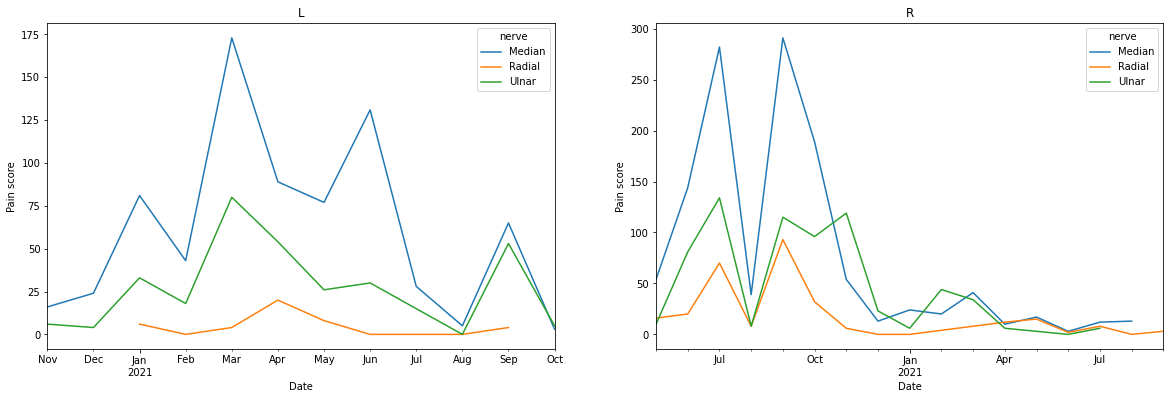

In [27]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

for i,items in enumerate(df_hand.set_index('Date').groupby('arm')):
    n,g = items
    g = g.groupby('nerve').resample('M')['Pain score'].sum().reset_index().set_index('Date').sort_index().pivot(columns='nerve').droplevel(level=0,axis=1)
    g.plot(ax=ax[i])
    ax[i].set_title(n)
    ax[i].set_ylabel('Pain score')

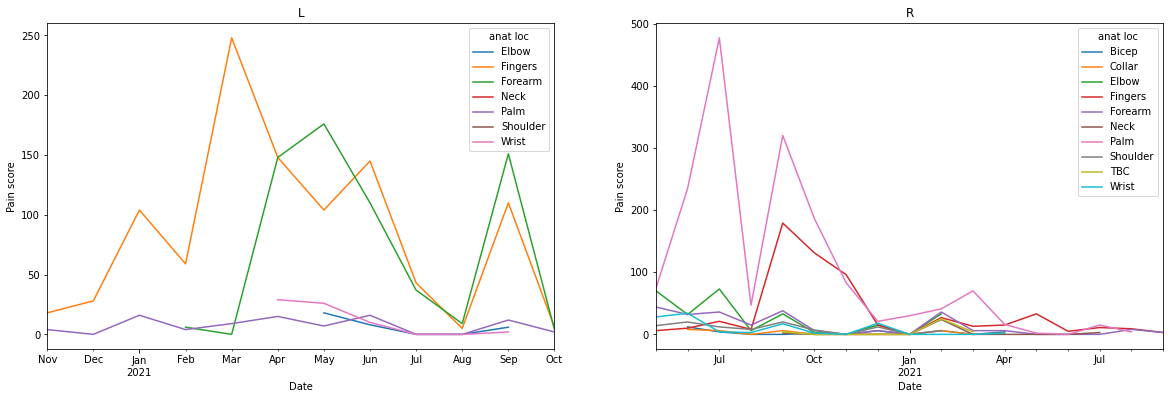

In [28]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

for i,items in enumerate(dfl.set_index('Date').groupby('arm')):
    n,g = items
    g = g.groupby('anat loc').resample('m')['Pain score'].sum().reset_index().set_index('Date').sort_index().pivot(columns='anat loc').droplevel(level=0,axis=1)
    g.plot(ax=ax[i])
    ax[i].set_title(n)
    ax[i].set_ylabel('Pain score')

In [29]:
df_plotting = df.set_index('Date').groupby('arm').resample('m')['Pain score'].sum().reset_index().set_index('Date').sort_index()

In [30]:
loffset=pd.Timedelta(14, 'd')
df_plotting.index = df_plotting.index-loffset

Text(0.5, 1.0, 'Sum of Pain Score entries')

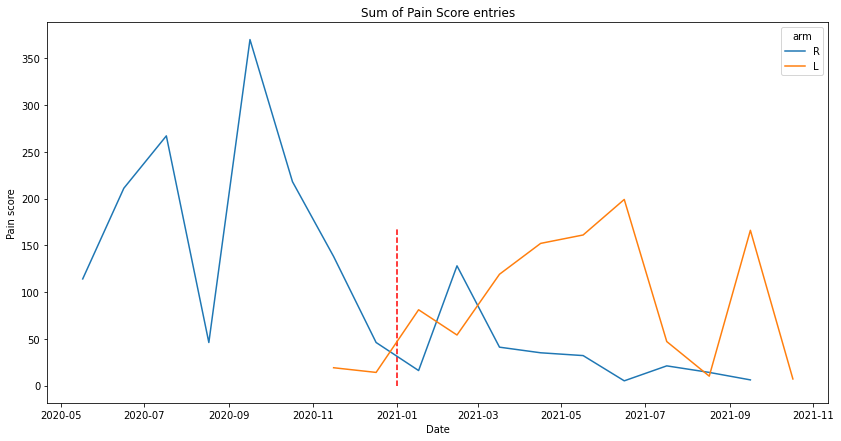

In [31]:
fig,ax=plt.subplots(figsize=(14,7))
sns.lineplot(data=df_plotting,x='Date',y='Pain score',ax=ax,hue='arm')
ax.vlines(x=18628,ymin=0,ymax=170,color='r',linestyle='--')
ax.set_title('Sum of Pain Score entries')

In [32]:
df_plotting = df.set_index('Date').groupby('arm').resample('d')['Pain score'].sum().reset_index().set_index('Date').sort_index()
df_plotting['day'] = df_plotting.index.dayofweek
df_plotting['year'] = df_plotting.index.year
df_plotting['month'] = df_plotting.index.month
df_plotting['week'] = df_plotting.index.isocalendar().week

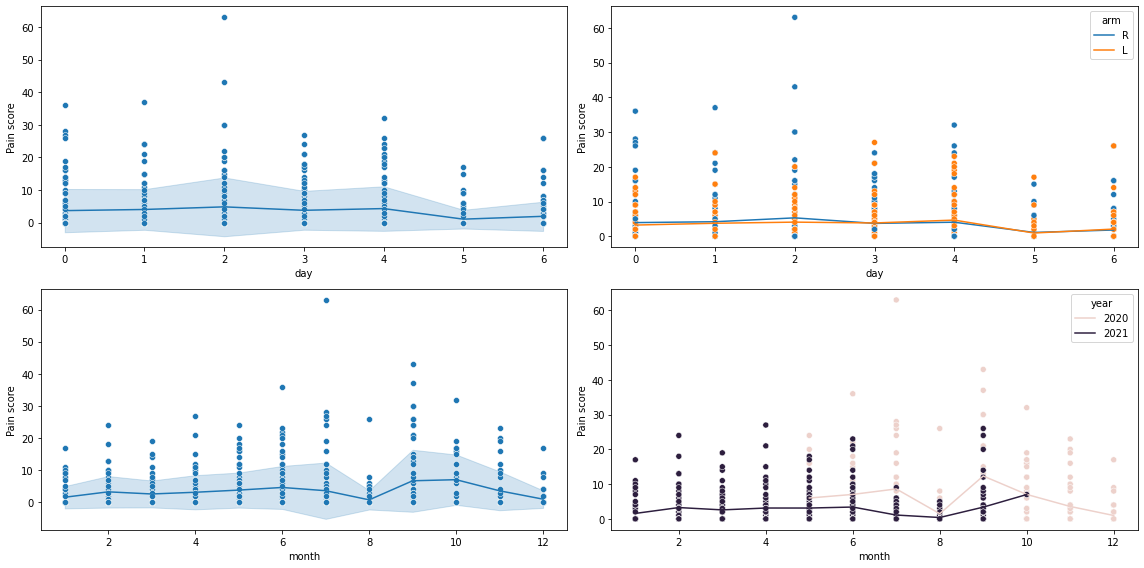

In [33]:
fig,ax=plt.subplots(2,2,figsize=(16,8))

# Day
sns.lineplot(data=df_plotting,x='day',y='Pain score',ci='sd',ax=ax[0,0])
sns.scatterplot(data=df_plotting,x='day',y='Pain score',ax=ax[0,0])

# Day - by year
sns.lineplot(data=df_plotting,x='day',y='Pain score',ci=None,hue='arm',ax=ax[0,1])
sns.scatterplot(data=df_plotting,x='day',y='Pain score',hue='arm',ax=ax[0,1],legend=False)

# Month
sns.lineplot(data=df_plotting,x='month',y='Pain score',ci='sd',ax=ax[1,0])
sns.scatterplot(data=df_plotting,x='month',y='Pain score',ax=ax[1,0])

# Month - by year
sns.lineplot(data=df_plotting,x='month',y='Pain score',ci=None,hue='year',ax=ax[1,1])
sns.scatterplot(data=df_plotting,x='month',y='Pain score',hue='year',ax=ax[1,1],legend=False)

plt.tight_layout()

# Plotting x & y location by Pain score

In [34]:
df_res = df.groupby(['arm','y location','x location'])['Pain score'].sum().sort_values(ascending=False).to_frame()#.reset_index()
df_res['Pain score %'] = df_res['Pain score']/df_res['Pain score'].sum()

<AxesSubplot:title={'center':'Right arm - Top 25%'}, ylabel='y location,x location'>

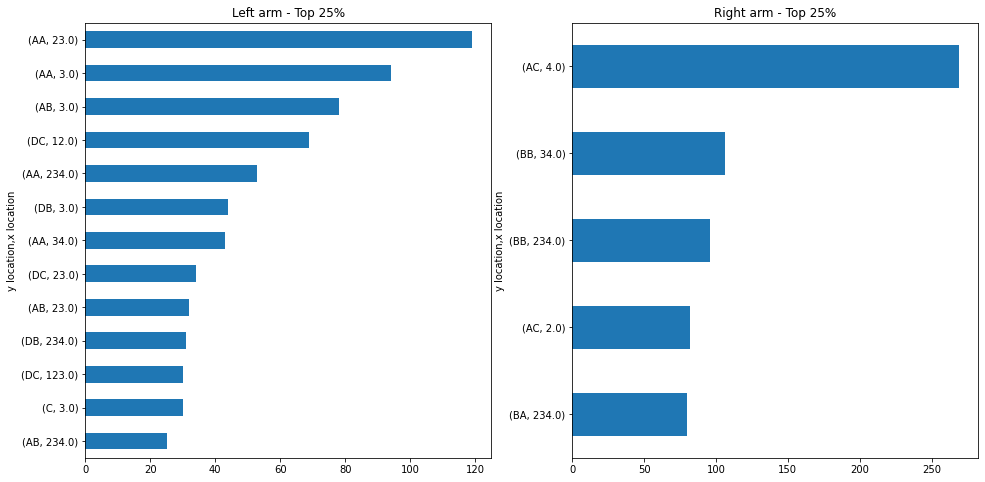

In [35]:
top_pct_L = 0.25
df_res_L = df_res.loc['L']
df_res_L_tp = df_res_L[df_res_L['Pain score %'].cumsum()<=top_pct_L]

top_pct_R = 0.25
df_res_R = df_res.loc['R']
df_res_R_tp = df_res_R[df_res_R['Pain score %'].cumsum()<=top_pct_R]

fig,ax=plt.subplots(1,2,figsize=(16,8))
df_res_L_tp['Pain score'].sort_values().plot.barh(title='Left arm - Top '+str(int(100*top_pct_L))+'%',ax=ax[0])
df_res_R_tp['Pain score'].sort_values().plot.barh(title='Right arm - Top '+str(int(100*top_pct_R))+'%',ax=ax[1])

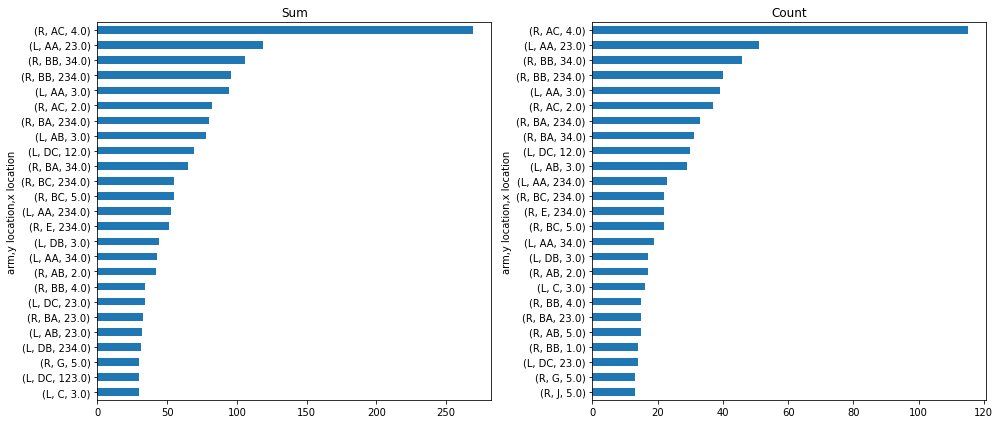

In [36]:
fig,ax=plt.subplots(1,2,figsize=(16,4))
df.groupby(['arm','y location','x location'])['Pain score'].sum().sort_values(ascending=True).tail(25).plot.barh(figsize=(14,6),ax=ax[0],title='Sum')
df.groupby(['arm','y location','x location'])['Pain score'].count().sort_values(ascending=True).tail(25).plot.barh(figsize=(14,6),ax=ax[1],title='Count')
plt.tight_layout()

In [48]:
df[df.iloc[:,1:].isna().all(axis=1)]

,Date,Day,Time,Side,y location,x location,Pain type,Pain level,arm,Pain score
16,2020-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2020-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2020-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2020-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2020-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1376,2021-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377,2021-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1378,2021-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1379,2021-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_hand.to_csv('pain_data_hand.csv')
dfl.to_csv('pain_data.csv')

In [70]:
df_hand.shape

(1393, 12)